## Task 1: Import packages and Load data

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
# Đọc tệp CSV
file_path = 'data/german_credit_data.csv'  # Đường dẫn đến file CSV
df = pd.read_csv(file_path)  # Đọc tệp Excel vào DataFrame
# Hiển thị dữ liệu
print(df)

     Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0             0   67    male    2     own             NaN           little   
1             1   22  female    2     own          little         moderate   
2             2   49    male    1     own          little              NaN   
3             3   45    male    2    free          little           little   
4             4   53    male    2    free          little           little   
..          ...  ...     ...  ...     ...             ...              ...   
995         995   31  female    1     own          little              NaN   
996         996   40    male    3     own          little           little   
997         997   38    male    2     own          little              NaN   
998         998   23    male    2    free          little           little   
999         999   27    male    2     own        moderate         moderate   

     Credit amount  Duration              Purpose  Risk  
0    

In [7]:
df = df.rename(columns={"Credit amount": "Credit_amount"})# Đổi tên cột

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit_amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [9]:
df.describe()

,Unnamed: 0,Age,Job,Credit_amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [10]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit_amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [11]:
# Check missing values
df.isnull().sum().sort_values(ascending=False)

Checking account    394
Saving accounts     183
Unnamed: 0            0
Sex                   0
Age                   0
Housing               0
Job                   0
Credit_amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [12]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit_amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


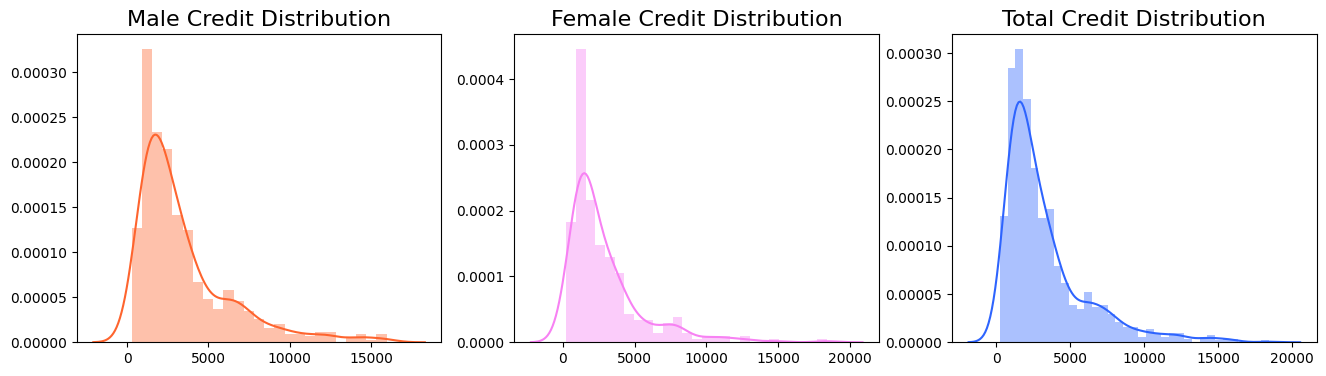

In [13]:
# Phân phối tiền tín dụng ở mỗi giới tính
male_credit = df["Credit_amount"].loc[df["Sex"] == "male"].values #Lọc ra cột có giới tính là đàn ông
female_credit = df["Credit_amount"].loc[df["Sex"] == "female"].values
total_credit = df['Credit_amount'].values

fig, ax = plt.subplots(1, 3, figsize=(16,4))

sns.distplot(male_credit, ax=ax[0], color="#FE642E")
ax[0].set_title("Male Credit Distribution", fontsize=16)
# Xóa nhãn trục y
ax[0].set_ylabel('')
sns.distplot(female_credit, ax=ax[1], color="#F781F3")
ax[1].set_title("Female Credit Distribution", fontsize=16)
# Xóa nhãn trục y
ax[1].set_ylabel('')
sns.distplot(total_credit, ax=ax[2], color="#2E64FE")
ax[2].set_title("Total Credit Distribution", fontsize=16)
# Xóa nhãn trục y
ax[2].set_ylabel('')
plt.show()
# Đường line KDE cho thấy: phân bố tín dụng của cả nam giới và nữ giới đều có xu hướng lệch phải, cho thấy rằng mật độ phân lớn trường hợp có số tiền tín dụng thấp, chỉ một số ít trường hợp cao
# - Ở Nam là khoảng 3000-4000 euro
# - Ở Nữ là khoảng 2000-3000 euro
# Tổng thể là khoàng 3000-400- euro ở cả nam và nữ  

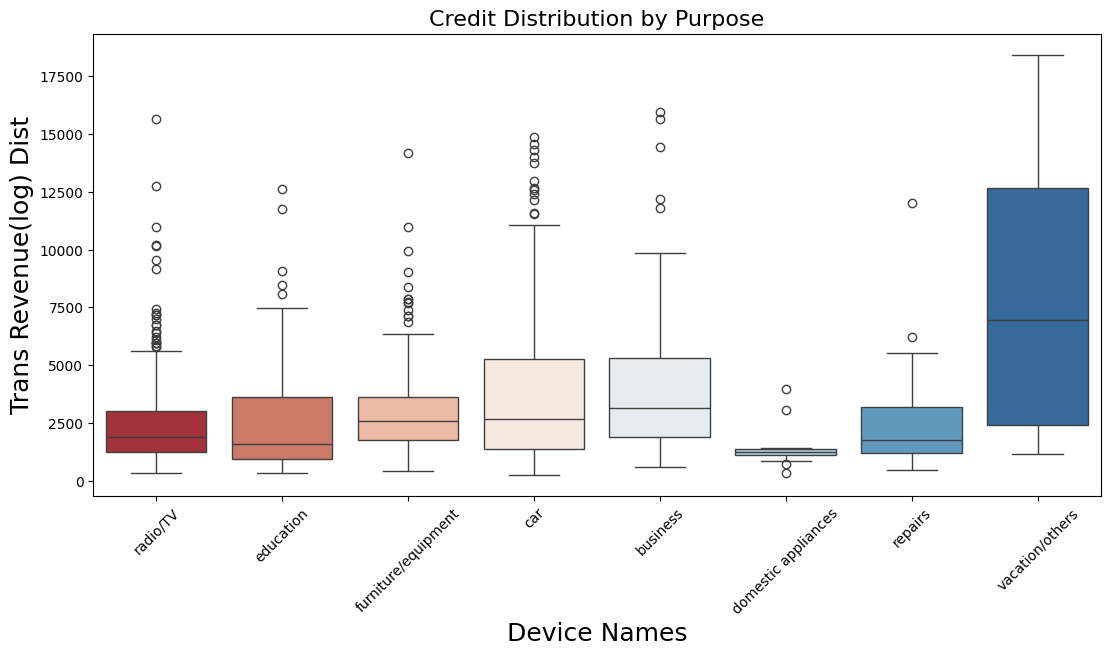

In [18]:
import seaborn as sns

plt.figure(figsize=(13,6)) #figure size
g = sns.boxplot(x='Purpose', y='Credit_amount', 
                   data=df, palette="RdBu")


g.set_title("Credit Distribution by Purpose", fontsize=16)
g.set_xticklabels(g.get_xticklabels(),rotation=45) # xoay chữ trên trục X qua 45 độ
g.set_xlabel('Device Names', fontsize=18) # Xlabel
g.set_ylabel('Trans Revenue(log) Dist', fontsize=18) 
plt.show()

### Phân tích theo nhóm:


#### 1. Phân tích theo giới tính:
##### Mục tiêu:
        - Tìm được phân phối giới tính cho vay theo dữ liệu
        - Xem mức độ phân phối giới tính theo tuổi
        - Kiểm tra những lý do chính vay nợ theo tuổi? Những lí do này có ảnh hưởng bới tuổi tác không?
        - Có bao nhiêu công việc theo mỗi giới tính? Bao nhiêu người thất nghiệp?
     

In [14]:
# Oử Đức, tỉ lệ sử dụng thẻ tín dụng ở Đức ở phụ nữ gấp đôi so với nam giới
df["Sex"].value_counts()

Sex
male      690
female    310
Name: count, dtype: int64

In [15]:
from plotly import tools
import chart_studio.plotly as py
import plotly.graph_objs as go

by_age = df['Age'].values.tolist()
male_age = df['Age'].loc[df['Sex'] == 'male'].values.tolist()
female_age = df['Age'].loc[df['Sex'] == 'female'].values.tolist()

trace0 = go.Histogram(
    x=male_age,
    histnorm='probability',
    name="German Male",
    marker = dict(
        color = 'rgba(100, 149, 237, 0.6)',
    )
)
trace1 = go.Histogram(
    x=female_age,
    histnorm='probability',
    name="German Female",
    marker = dict(
        color = 'rgba(255, 182, 193, 0.6)',
    )
)
trace2 = go.Histogram(
    x=by_age,
    histnorm='probability',
    name="Overall Gender",
     marker = dict(
        color = 'rgba(169, 169, 169, 0.6)',
    )
)
fig = tools.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Nam','Nữ', 'Nam và Nữ'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Phân phối theo giới tính', bargap=0.05)
iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

In [19]:
# Mục đích sử dụng thẻ tín dụng ở mỗi giới tính
df["Purpose"].unique()
sex_purpose = pd.crosstab(df['Purpose'], df['Sex']).apply(lambda x: x/x.sum() * 100)
sex_purpose

Sex,female,male
Purpose,,
business,6.129032,11.304348
car,30.322581,35.217391
domestic appliances,1.935484,0.869565
education,7.741935,5.072464
furniture/equipment,23.870968,15.507246
radio/TV,27.419355,28.260870
repairs,1.612903,2.463768
vacation/others,0.967742,1.304348


In [7]:
# Values into list
m_purpose = sex_purpose['male'].values.tolist()
f_purpose = sex_purpose['female'].values.tolist()

# Làm tròn giá trị
male_purpose = ['%.2f' % elem for elem in m_purpose]
female_purpose = ['%.2f' % elem for elem in f_purpose]

male = go.Bar(
    y=['business', 'car', 'domestic appliances', 'education', 'furniture/equipment',
      'radio/TV', 'repairs', 'vacation/others'],
    x=male_purpose,
    name='German Males',
    text='(%)',
    orientation = 'h',
    marker = dict(
        color = 'rgba(72, 92, 238, 0.6)',
        line = dict(
            color = 'rgba(72, 92, 238, 1.0)',
            width = 3)
    )
)
female = go.Bar(
    y=['business', 'car', 'domestic appliances', 'education', 'furniture/equipment',
      'radio/TV', 'repairs', 'vacation/others'],
    x=female_purpose,
    name='German Females',
    text='(%)',
    orientation = 'h',
    marker = dict(
        color = 'rgba(217, 128, 234, 0.6)',
        line = dict(
            color = 'rgba(217, 128, 234, 1.0)',
            width = 3)
    )
)

data = [male, female]
layout = dict(
    title='Application Reasons for a Loan by Gender',
     xaxis=dict(
        title='(% of Gender)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=11,
            color='black'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        title='Purpose for the Loan',
        titlefont=dict(
            family='Arial, sans-serif',
            size=11,
            color='black'
        ),
        showticklabels=True,
        tickangle=40,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=10,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    barmode='stack'
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='marker-h-bar')

In [8]:
# Phần trăm phân phối giới tính (Mỗi giới tính có bao nhiêu công việc theo %)
number_of_jobs = pd.crosstab(df["Job"], df["Sex"]).apply(lambda x: x/x.sum() * 100)
number_of_jobs

Sex,female,male
Job,,
0,3.870968,1.449275
1,20.645161,19.710145
2,63.548387,62.753623
3,11.935484,16.086957


##### Kết quả đạt được:
        Có gấp 2 lần số nam giới so với số nữ giới trong tập dữ liệu của chúng tôi.
        Hầu hết phụ nữ nộp đơn xin vay tín dụng đều dưới 30 tuổi.
        Hầu hết nam giới nộp đơn xin vay đều ở độ tuổi từ 20 đến 40
        Phụ nữ có nhiều khả năng nộp đơn xin vay tín dụng để mua đồ nội thất và thiết bị hơn. (nhiều hơn nam giới 10%)
        Nam giới nộp đơn xin vay tín dụng nhiều hơn nữ giới gấp 2 lần để đầu tư vào doanh nghiệp.
        Gấp 2 lần phụ nữ thất nghiệp so với nam giới.
        Gấp 2 lần nam giới làm 3 công việc so với nữ giới.
        Hầu hết những người nộp đơn xin vay tín dụng đều có hai công việc

#### 2. Phân tích theo tuổi:
##### Tạo ra các nhóm phân loại theo tuổi:
            Young: Tuổi khách hàng dao động từ (19 - 29).
            Young Adults: Tuổi khách hàng dao động từ (30-40)
            Senior: Tuổi khách hàng dao động từ (41-55)
            Elder: Tuổi khách hàng lớn hơn 55 tuổi
##### Mục tiêu mong muốn:
        Tạo các nhóm tuổi khác nhau dựa trên độ tuổi của họ.
        Xem số tiền tín dụng được vay bởi khách hàng thuộc từng nhóm tuổi.
        Đi sâu hơn vào phân tích  và xác định khoản vay nào có rủi ro cao và xem liệu có bất kỳ mô hình nào liên quan đến nhóm tuổi hay không?

In [20]:
# Tạo ra mỗi nhóm gồm các khoản vay có rủi ro và không rủi ro
df['Age_Group'] = np.nan

lst = [df]

for col in lst:
    col.loc[(col['Age'] > 18) & (col['Age'] <= 29), 'Age_Group'] = 'Young'
    col.loc[(col['Age'] > 29) & (col['Age'] <= 40), 'Age_Group'] = 'Young Adults'
    col.loc[(col['Age'] > 40) & (col['Age'] <= 55), 'Age_Group'] = 'Senior'
    col.loc[col['Age'] > 55, 'Age_Group'] = 'Elder' 
    
# Xóa cột "Unnamed" (nếu cột này tồn tại)
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=["Unnamed: 0"])
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit_amount,Duration,Purpose,Risk,Age_Group
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Elder
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Young
2,49,male,1,own,little,NaN,2096,12,education,good,Senior
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Senior
4,53,male,2,free,little,little,4870,24,car,bad,Senior


In [19]:
# Take credit amount values into a list
young = df['Credit_amount'].loc[df['Age_Group'] == 'Young'].values.tolist()
young_adults = df['Credit_amount'].loc[df['Age_Group'] == 'Young Adults'].values.tolist()
senior = df['Credit_amount'].loc[df['Age_Group'] == 'Senior'].values.tolist()
elder_credit = df['Credit_amount'].loc[df['Age_Group'] == 'Elder'].values.tolist()

# Create the box plots by age category
young_credit = go.Box(
    y = young,
    name = "Young",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(150, 198, 109)'),
    line = dict(
        color = 'rgb(111, 200, 37)')
)

young_adults_credit = go.Box(
    y = young_adults,
    name = "Young Adults",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(124, 236, 212)'),
    line = dict(
        color = 'rgb(38, 214, 177)')
)

senior_credit = go.Box(
    y = senior,
    name = "Seniors",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(241, 93, 93)'),
    line = dict(
        color = 'rgb(225, 44, 44)')
)

elder_credit = go.Box(
    y = elder_credit,
    name = "Elders",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(180, 121, 72)'),
    line = dict(
        color = 'rgb(115, 77, 46)')
)

data = [young_credit, young_adults_credit, senior_credit, elder_credit]

layout = dict(
    title="Số tiền tín dụng theo phân khúc nhóm tuổi", 
    xaxis = dict(title="Nhóm theo tuổi"),
    yaxis= dict(title="Tiền tín dụng")
)

fig = dict(data=data, layout=layout)
iplot(fig, filename="Box Plot")

In [20]:
good_credit_df = df.loc[df['Risk'] == "good"]
bad_credit_df = df.loc[df['Risk'] == "bad"]

good_credit_df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit_amount,Duration,Purpose,Risk,Age_Group
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Elder
2,49,male,1,own,little,NaN,2096,12,education,good,Senior
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Senior
5,35,male,1,free,NaN,NaN,9055,36,education,good,Young Adults
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good,Senior


In [22]:
fig = {
    "data": [
        {
            "type": 'violin',
            "x": good_credit_df['Age_Group'],
            "y": good_credit_df['Credit_amount'],
            "legendgroup": 'Good Credit', #tín dụng tốt
            "scalegroup": 'No',
            "name": 'Good Credit',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'rgb(34, 178, 178)'
            }
        },
        {
            "type": 'violin',
            "x": bad_credit_df['Age_Group'],
            "y": bad_credit_df['Credit_amount'],
            "legendgroup": 'Bad Credit', # tín dụng xấu
            "scalegroup": 'No',
            "name": 'Bad Credit',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'rgb(178, 34, 34)'
            }
        }
    ],
    "layout" : {
        "title": "Phân tích vay nợ tín dụng theo nhóm tuổi",
        "yaxis": {
            "zeroline": False,
        },
        "violingap": 0,
        "violinmode": "overlay"
    }
}


iplot(fig, filename = 'Age-Housing', validate=False)

In [24]:
# Tìm các khoản vay theo nhóm tuổi và mức độ rủi ro rồi thể hiện chúng trên biểu đồ thanh.

# phân khúc nhóm tuổi
young_good = df['Credit_amount'].loc[(df['Age_Group'] == 'Young') & (df['Risk'] == 'good')].sum()
young_bad = df['Credit_amount'].loc[(df['Age_Group'] == 'Young') & (df['Risk'] == 'bad')].sum()
young_adult_good = df['Credit_amount'].loc[(df['Age_Group'] == 'Young Adults') & (df['Risk'] == 'good')].sum()
young_adult_bad = df['Credit_amount'].loc[(df['Age_Group'] == 'Young Adults') & (df['Risk'] == 'bad')].sum()
senior_good = df['Credit_amount'].loc[(df['Age_Group'] == 'Senior') & (df['Risk'] == 'good')].sum()
senior_bad = df['Credit_amount'].loc[(df['Age_Group'] == 'Senior') & (df['Risk'] == 'bad')].sum()
elder_good = df['Credit_amount'].loc[(df['Age_Group'] == 'Elder') & (df['Risk'] == 'good')].sum()
elder_bad = df['Credit_amount'].loc[(df['Age_Group'] == 'Elder') & (df['Risk'] == 'bad')].sum()

# Phần trăm
young_good_p = young_good/(young_good + young_bad) * 100
young_bad_p = young_bad/(young_good + young_bad) * 100
young_adult_good_p = young_adult_good/(young_adult_good + young_adult_bad) * 100
young_adult_bad_p = young_adult_bad/(young_adult_good + young_adult_bad) * 100
senior_good_p = senior_good/(senior_good + senior_bad) * 100
senior_bad_p =  senior_bad/(senior_good + senior_bad) * 100
elder_good_p = elder_good/(elder_good + elder_bad) * 100
elder_bad_p = elder_bad/(elder_good + elder_bad) * 100

# Round Percents
young_good_p = str(round(young_good_p, 2))
young_bad_p = str(round(young_bad_p, 2))
young_adult_good_p = str(round(young_adult_good_p, 2))
young_adult_bad_p = str(round(young_adult_bad_p, 2))
senior_good_p = str(round(senior_good_p, 2))
senior_bad_p = str(round(senior_bad_p, 2))
elder_good_p = str(round(elder_good_p, 2))
elder_bad_p = str(round(elder_bad_p, 2))



x = ["Young", "Young Adults", "Senior", "Elder"]

good_loans = go.Bar(
    x=x,
    y=[young_good, young_adult_good, senior_good, elder_good],
    name="Good Loans",# tỉ lệ vây nợ tốt
    text=[young_good_p + '%', young_adult_good_p + '%', senior_good_p + '%', elder_good_p + '%'],
    textposition = 'auto',
    marker=dict(
        color='rgb(111, 235, 146)',
        line=dict(
            color='rgb(60, 199, 100)',
            width=1.5),
        ),
    opacity=0.6
)

bad_loans =  go.Bar(
    x=x,
    y=[young_bad, young_adult_bad, senior_bad, elder_bad],
    name="Bad Loans",# tỉ lệ vây nợ xấu
    text=[young_bad_p + '%', young_adult_bad_p + '%', senior_bad_p + '%', elder_bad_p + '%'],
    textposition = 'auto',
    marker=dict(
        color='rgb(247, 98, 98)',
        line=dict(
            color='rgb(225, 56, 56)',
            width=1.5),
        ),
    opacity=0.6
)

data = [good_loans, bad_loans]

layout = dict(
    title="Loại hình vay theo nhóm tuổi", 
    xaxis = dict(title="Nhóm tuổi"),
    yaxis= dict(title="Tiền tín dụng")
)

fig = dict(data=data, layout=layout)

iplot(fig, filename='grouped-bar-direct-labels')


##### Kết quả đạt được:
         - Nhóm tuổi trẻ có xu hướng yêu cầu các khoản vay cao hơn một chút so với nhóm tuổi lớn hơn.
         - Nhóm trẻ và người cao tuổi có tỷ lệ các khoản vay rủi ro cao cao nhất. Với 45,29% trong số tất cả các khách hàng thuộc nhóm tuổi trẻ được coi là có rủi ro cao.
         - Số lượng các khoản vay được coi là rủi ro cao trong nhóm người cao tuổi là 44,28% tổng số người được coi là trong nhóm người cao tuổi.
         - Đây là những nhóm có nhiều khả năng thất nghiệp hoặc làm việc bán thời gian nhất, vì nhóm trẻ nhất không có kinh nghiệm để có việc làm hoặc họ đang học đại học nên họ không có đủ thời gian để làm việc toàn thời gian.
         - Về phía nhóm người cao tuổi, đây là nhóm có nhiều khả năng nhận tiền từ lương hưu của họ, nghĩa là nhóm người cao tuổi có nhiều khả năng thất nghiệp hoặc làm việc bán thời gian.

#### 3. Phân tích tài sản
##### - Chúng tôi sẽ phân tích lượng tài sản mà khách hàng có bằng cách phân tích tài khoản thanh toán của họ và liệu tình trạng tài sản của khách hàng có ảnh hưởng đến rủi ro của các khoản vay mà Lending Club cấp cho khách hàng hay không.

In [25]:
# có một số giá trị bị thiếu nên cần bỏ qua các giá trị bị thiếu trong phân tích này.
df["Checking account"].unique()
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit_amount', 'Duration', 'Purpose', 'Risk', 'Age_Group'],
      dtype='object')

In [27]:
cross_checking = pd.crosstab(df['Risk'], df['Checking account']).apply(lambda x: x/x.sum() * 100)
decimals = pd.Series([2,2,2], index=['little', 'moderate', 'rich']) # kiểm tra lượng tài sản từ ít, tương đối, đến giàu có.

cross_checking = cross_checking.round(decimals)
cross_checking

Checking account,little,moderate,rich
Risk,,,
bad,49.27,39.03,22.22
good,50.73,60.97,77.78


In [30]:
import chart_studio.plotly as py
import plotly.graph_objs as go


bad_little = cross_checking['little'][0]
good_little = cross_checking['little'][1]
bad_moderate = cross_checking['moderate'][0]
good_moderate = cross_checking['moderate'][1]
bad_rich = cross_checking['rich'][0]
good_rich = cross_checking['rich'][1]

little = go.Bar(
    x=['Bad Risk', 'Good Risk'],
    y=[bad_little, good_little],
    name="Little Wealth",
    text='%',
     marker=dict(
        color='#FF5050',
         line=dict(
            color='#E13232',
            width=1.5),
    ),
)

moderate = go.Bar(
    x=['Bad Risk', 'Good Risk'],
    y=[bad_moderate, good_moderate],
    name="Moderate Wealth",
    text='%',
    xaxis='x2',
    yaxis='y2',
    marker=dict(
        color='#FFB232',
         line=dict(
            color='#CD8000',
            width=1.5),
    ),
)
rich = go.Bar(
    x=['Bad Risk', 'Good Risk'],
    y=[bad_rich, good_rich],
    name="Rich Wealth",
    text="%",
    marker=dict(
        color='#8DFF83',
         line=dict(
            color='#3DAF33',
            width=1.5),
    ),
    xaxis='x3',
    yaxis='y3'
)

data=[little, moderate, rich]

fig = tools.make_subplots(rows=1, cols=3, subplot_titles=('Little Wealth', 'Moderate Wealth', 'Rich Wealth'))

fig.append_trace(little, 1, 1)
fig.append_trace(moderate, 1, 2)
fig.append_trace(rich, 1, 3)

fig['layout'].update(height=400, width=800, title='Mức độ rủi ro' +
                                                  ' theo tài sản')


iplot(fig, filename='make-subplots-multiple-with-titles')

##### Kết quả đạt được:
- Những cá nhân thuộc nhóm "tài sản ít" có khả năng cao hơn về các khoản vay rủi ro xấu so với các loại nhóm khác.
- Tài sản càng cao, khả năng thấp hơn về các khoản vay rủi ro xấu.

##### 3.1. Rủi ro vay cao và rủi ro vay thấp

In [22]:
# Tạo ra cột mới tên là "Risk_int"
df['Risk_int'] = np.nan
lst = [df]

for col in lst:
    col.loc[df['Risk'] == 'bad', 'Risk_int'] = 0 # 0 tượng trưng cho "bad risk"
    col.loc[df['Risk'] == 'good', 'Risk_int'] = 1 #1 tượng trưng cho "good risk"
    
    
df['Risk_int'] = df['Risk_int'].astype(int)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit_amount,Duration,Purpose,Risk,Age_Group,Risk_int
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Elder,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Young,0
2,49,male,1,own,little,NaN,2096,12,education,good,Senior,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Senior,1
4,53,male,2,free,little,little,4870,24,car,bad,Senior,0


In [23]:
import chart_studio.plotly as py
import plotly.figure_factory as ff

# Chỉ chọn các cột dạng số
numeric_df = df.select_dtypes(include=['number'])

# Tính toán ma trận tương quan
corr = numeric_df.corr()

arr_corr = corr.values
arr_corr = np.around(arr_corr, decimals=2)

columns = corr.columns.values.tolist()

fig = ff.create_annotated_heatmap(arr_corr, x=columns, y=columns, colorscale='Reds')

fig.layout.title = 'Pearson Correlation <br> (What Determines Risk in Loans?)'
iplot(fig, filename='annotated_heatmap')

In [26]:
# ---> Looking at correlations in the form of Scatterplots.

import chart_studio.plotly as py
import plotly.figure_factory as ff

import numpy as np
import pandas as pd

numeric_vals = df.select_dtypes(exclude=['object'])


risks = df['Risk'].values.tolist()

colormap = ['#b22222', '#4169e1']

numeric_matrix = numeric_vals.to_numpy()


dataframe = pd.DataFrame(numeric_matrix,
                         columns=['Credit_amount', 'Duration', 'Job', 'Age', 'Risk'])

dataframe['Risk'] = pd.Series(risks)


fig = ff.create_scatterplotmatrix(dataframe, diag='histogram', index='Risk', colormap=colormap,
                                  height=800, width=800)
iplot(fig, filename='Histograms along Diagonal Subplots')

In [27]:
# Số tiền tín dụng càng cao thì rủi ro của khoản vay càng cao
# Thời hạn vay càng dài thì rủi ro của khoản vay càng cao?

bad_credit_amount = df["Credit_amount"].loc[df['Risk'] == 'bad'].values.tolist()
good_credit_amount = df["Credit_amount"].loc[df['Risk'] == 'good'].values.tolist()
bad_duration = df['Duration'].loc[df['Risk'] == 'bad'].values.tolist()
good_duration = df['Duration'].loc[df['Risk'] == 'good'].values.tolist()


bad_loans = go.Scatter(
    x = bad_duration,
    y = bad_credit_amount,
    name = 'Bad Loans',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

good_loans = go.Scatter(
    x = good_duration,
    y = good_credit_amount,
    name = 'Good Loans',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(34, 139, 34, .9)',
        line = dict(
            width = 2,
        )
    )
)

data = [bad_loans, good_loans]

layout = dict(title = 'Correlation of Risk with <br> Credit Amount Borrowed',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )

fig = dict(data=data, layout=layout)
iplot(fig, filename='styled-scatter')

##### Kết quả đạt được:
- Số tiền tín dụng vay càng cao, khả năng khoản vay trở thành nợ xấu càng cao.
- Thời hạn vay càng dài, khả năng khoản vay trở thành nợ xấu càng cao
- Người cao tuổi và người lớn tuổi vay trên 12 nghìn có khả năng cao trở thành nợ xấu
- Nếu số tiền tín dụng vay tương đương 11.000 trở lên, khả năng khoản vay trở thành nợ xấu tăng mạnh. (Quan sát mối tương quan giữa rủi ro và số tiền tín dụng vay.)

##### 3.2. Mục đích vay nợ tín dụng
 Trong phần này, mục đích chính của tôi là xem mục đích nào có nhiều khả năng mang lại rủi ro nhất, nói cách khác, mục đích nào trong số những mục đích này có nhiều khả năng được coi là khoản vay rủi ro cao. Ngoài ra, tôi muốn khám phá khía cạnh hoạt động của doanh nghiệp, bằng cách xác định mục đích nào đóng góp nhiều nhất vào các khoản vay được phát hành.

In [28]:
import chart_studio.plotly as py
import plotly.graph_objs as go

# Biểu đồ Scatterpolar
radio_tv = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'radio/TV'].values)
education = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'education'].values)
furniture = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'furniture/equipment'].values)
car = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'car'].values)
business = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'business'].values)
domestic_app = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'domestic appliances'].values)
repairs = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'repairs'].values)
vacation_others = np.sum(df['Credit_amount'].loc[df['Purpose'] == 'vacation/others'].values)

df_purposes = pd.DataFrame(data=[[radio_tv, education, furniture, car, business, domestic_app, repairs, vacation_others]],
                          columns=df["Purpose"].unique())

print(df_purposes)

data = [
    go.Scatterpolar(
        r = [radio_tv, education, furniture,car, business, domestic_app, repairs, vacation_others],
        theta = df['Purpose'].unique().tolist(),
        line = dict(
            color = "#ff7f50"
        ),
        mode = 'lines+markers',
        fill='toself',
        marker = dict(
            color = '#8090c7',
            symbol='square',
            size=6
        )
    )
]

layout = go.Layout(
    showlegend = False,
    title= "Credit Distribution by Purpose",
    paper_bgcolor = "rgb(255, 245, 250)"
)

fig = dict(data=data, layout=layout)
iplot(fig, filename = 'polar/basic')

   radio/TV  education  furniture/equipment      car  business  \
0    696543     169873               555125  1269881    403330   

   domestic appliances  repairs  vacation/others  
0                17976    60018            98512  


In [29]:
df['Purpose'].unique()

cross_purpose = pd.crosstab(df['Purpose'], df['Risk']).apply(lambda x: x/x.sum() * 100)
cross_purpose = cross_purpose.round(decimals=2)
cross_purpose.sort_values(by=['bad'])

Risk,bad,good
Purpose,,
domestic appliances,1.33,1.14
vacation/others,1.67,1.00
repairs,2.67,2.00
education,7.67,5.14
business,11.33,9.00
furniture/equipment,19.33,17.57
radio/TV,20.67,31.14
car,35.33,33.00


In [30]:
# This will be x
purposes = df['Purpose'].unique().tolist()
purposes = sorted(purposes)

good_purposes = cross_purpose["good"].values.tolist()
bad_purposes = cross_purpose["bad"].values.tolist()




good = go.Bar(
    x=purposes,
    y=good_purposes,
    name='Good Risk',
    text='%',
    marker=dict(
        color='rgb(123, 255, 255)',
        line=dict(
            color='rgb(0, 213, 213)',
            width=1.5
        )
    ),
)
bad = go.Bar(
    x=purposes,
    y=bad_purposes,
    name='Bad Risk',
    text = '%',
    marker=dict(
        color='rgb(255, 123, 123)',
        line=dict(
            color='rgb(213, 0, 0)',
            width=1.5
        )
    ),
)
data = [good, bad]
layout = go.Layout(
    title='Which Purpose Carried the Highest Risk?',
    xaxis=dict(
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Percentage(%)',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='style-bar')

In [31]:
cross_credit = df.groupby(['Risk', 'Purpose'], as_index=False).Credit_amount.sum()

good_amnt = cross_credit["Credit_amount"].loc[cross_credit["Risk"] == "good"].values.tolist()
bad_amnt = cross_credit["Credit_amount"].loc[cross_credit["Risk"] == "bad"].values.tolist()

good_risk = {"x": good_amnt, 
          "y": purposes, 
          "marker": {"color": "rgb(28, 98, 98)", "size": 12}, 
          "mode": "markers", 
          "name": "Good Risk", 
          "type": "scatter"
}

bad_risk = {"x": bad_amnt, 
          "y": purposes, 
          "marker": {"color": "rgb(98, 28, 28)", "size": 12}, 
          "mode": "markers", 
          "name": "Bad Risk", 
          "type": "scatter", 
}

data = [good_risk, bad_risk]
layout = {"title": "Credit Loan Applications by Purpose", 
          "xaxis": {"title": "Credit Amount Borrowed", }, 
          "yaxis": {"title": ""},
         "width": 800,
         "height": 700}

fig = dict(data=data, layout=layout)
iplot(fig, filename='basic_dot-plot')

##### 3.2.1.Dự báo mô hình

In [33]:
# Check giá trị bị lỗi trong DataFrame
df.isnull().sum().sort_values(ascending=False)

Checking account    394
Saving accounts     183
Age                   0
Sex                   0
Housing               0
Job                   0
Credit_amount         0
Duration              0
Purpose               0
Risk                  0
Age_Group             0
Risk_int              0
dtype: int64

In [34]:
# Xóa các cột có giá trị bị thiếu mặc dù sẽ mất một số thông tin.
# mô hình có thể bị underfit trong tương lai.
df.drop(['Checking account', 'Saving accounts'], axis=1, inplace=True)

In [35]:
df.isnull().sum().sort_values(ascending=False) # kiểm tra lại

Age              0
Sex              0
Job              0
Housing          0
Credit_amount    0
Duration         0
Purpose          0
Risk             0
Age_Group        0
Risk_int         0
dtype: int64

In [78]:
# Feature Engineering (We cannot delete the missing values because we have too litle information)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit

df["Risk"].value_counts() # 70% is good risk and 30% is bad risk.

stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train, test in stratified.split(df, df["Risk"]):
    strat_train = df.loc[train]
    strat_test = df.loc[test]
    

# The main purpose of this code is to have an approximate ratio
# of 70% good risk and 30% bad risk in both training and testing sets.
strat_train["Risk"].value_counts() / len(df) 
strat_test["Risk"].value_counts() / len(df)

Risk
good    0.14
bad     0.06
Name: count, dtype: float64

In [67]:
# Have our new train and test data
train = strat_train
test = strat_test


# Our features
X_train = train.drop('Risk', axis=1)
X_test = test.drop('Risk', axis=1)

# Our Labels we will use them later
y_train = train["Risk"]
y_test = test["Risk"]

In [68]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int32)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [69]:
# Scikit-Learn does not handle dataframes in pipeline so we will create our own class.
# Reference: Hands-On Machine Learning
from sklearn.base import BaseEstimator, TransformerMixin
# Create a class to select numerical or cateogrical columns.
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit (self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [70]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler

numeric_train_df = X_train.select_dtypes(exclude=['object'])
numeric_test_df = X_test.select_dtypes(exclude=['object'])

categorical_train_df = X_train.select_dtypes(['object'])
categorical_test_df = X_test.select_dtypes(['object'])

numerical_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(numeric_train_df.columns.values.tolist())),
    ("std_scaler", StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('select_categoric', DataFrameSelector(categorical_train_df.columns.values.tolist())),
    ('encoding', CategoricalEncoder(encoding='onehot-dense'))
])

# Combine both pipelines
main_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', numerical_pipeline),
    ('cat_pipeline', categorical_pipeline)
])

X_train_scaled = main_pipeline.fit_transform(X_train)
X_test_scaled = main_pipeline.fit_transform(X_test)

In [71]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
y_train_scaled = encode.fit_transform(y_train)
y_test_scaled = encode.fit_transform(y_test)

In [72]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Implement gridsearchcv to see which are our best p

params = {'C': [0.75, 0.85, 0.95, 1], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [3, 4, 5]}

svc_clf = SVC(random_state=42)

grid_search_cv = GridSearchCV(svc_clf, params)
grid_search_cv.fit(X_train_scaled, y_train_scaled)

GridSearchCV(estimator=SVC(random_state=42),
             param_grid={'C': [0.75, 0.85, 0.95, 1], 'degree': [3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [73]:
grid_search_cv.best_estimator_

SVC(C=0.75, kernel='linear', random_state=42)

In [74]:
grid_search_cv.best_params_

{'C': 0.75, 'degree': 3, 'kernel': 'linear'}

In [75]:
svc_clf = grid_search_cv.best_estimator_
svc_clf.fit(X_train_scaled, y_train_scaled)

SVC(C=0.75, kernel='linear', random_state=42)

In [76]:
svc_clf.score(X_train_scaled, y_train_scaled)

1.0

In [77]:
from sklearn.model_selection import cross_val_score

# Let's make sure the data is not overfitting
svc_clf = SVC(kernel='rbf', C=1, random_state=42)
scores = cross_val_score(svc_clf, X_train_scaled, y_train_scaled)
scores.mean()

np.float64(1.0)

In [63]:
from sklearn.metrics import accuracy_score

svc_clf.fit(X_train_scaled, y_train_scaled)
y_pred = svc_clf.predict(X_test_scaled)

# Accuracy score 71%
accuracy_score(y_test_scaled, y_pred)

1.0